# Problem Statement

Covid 19 adalah virus yang menyerang indonesia pertama kali pada 2 Maret 2020 di kota Depok. Virus ini adalah virus yang sangat berbahaya dan mudah menyebar lewat tetesan yang dihasilkan ketika orang yang terinfeksi sedang batuk, bersin, atau menghembuskan napas. Indonesia sendiri termasuk dalam posisi ke-5 terkait penambahan kasus Covid-19 per 24 Juni 2021. Hal tersebut bisa terjadi karena warga Indonesia banyak yang menyepelekan Virus Covid 19 dan sekaligus menyebabkan banyaknya korban jiwa bagi negara Indonesia. Tidak hanya korban jiwa tapi covid sendiri menyebabkan perekonomian dan sektor perusahaan di Indonesia menjadi menurun, dan dapat menghambat perkembangan negara Indonesia. Terlebih di beberapa wilayah yang dikenal sebagai sektor perekonomian tertinggi di Indonesia yakni Jakarta. Covid 19 ini sendiri juga telah menyebabkan adanya transformasi sebagaian besar perusahaan di Indonesia yang awalnya hanya beroperasi secara konvensional ke arah digital dikarenakan adanya pembatasan interaksi sosial dengan orang lain selama berlangsungnya PPKM di Indonesia. Dikarenakan covid 19 sangat berdampak buruk di Indonesia, hal yang dapat mencegah penyebaran dari virus ini adalah dengan memiliki beberapa data dari waktu sebelumnya dan melakukan langkah yang tepat agar dapat meminimalisir penyebaran covid 19 yang sangat cepat.

# Data Cleaning, Preprocessing, Exploration and Modeling Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_row', None)

memberikan kolom tanggal pada tiap dataset perhari untuk memudahkan melihat perkembangan data covid
selama sebulan

In [2]:
# hari1 = pd.read_excel('Data sebulan raw/Standar Kelurahan Data Corona (31 Oktober 2020 Pukul 10.00).xlsx')
# hari1.insert(0, 'tanggal','31/10/2020')
# hari1.to_csv('tanggal31.csv')

menggabungkan data data yang telah ada kolom tanggal dan save to csv agar lebih mudah d olah

In [3]:
# bulan = pd.concat(map(pd.read_csv, glob.glob('Data sebulan/*.csv')))
# bulan.to_csv('Data compfest.csv')

dibersihkan dari kolom duplikat dan reset indeks

In [4]:
pd.set_option('display.max_columns',None)
sebulan =pd.read_csv('Data Set/Compfest Dataset/Data compfest.csv',sep=';')
df=sebulan.drop(sebulan.columns[[0,13,14,16,18,19,20,22,23,26,30,32,33]], axis=1)
data = df.reset_index(drop = True)
data


,tanggal,ID_KEL,Nama_provinsi,nama_kota,nama_kecamatan,nama_kelurahan,SUSPEK,Perawatan RS,Isolasi di Rumah,Suspek Meninggal,Selesai Isolasi,PROBABLE,Probable Meninggal,PELAKU PERJALANAN,KONTAK ERAT,DISCARDED,Meninggal,POSITIF,Dirawat,Sembuh,Self Isolation
0,01/10/2020,3172051003,DKI JAKARTA,JAKARTA UTARA,PADEMANGAN,ANCOL,372,0,14,0,358,4,0,9,540,7,0,202,0,165,35
1,01/10/2020,3173041007,DKI JAKARTA,JAKARTA BARAT,TAMBORA,ANGKE,342,2,11,2,327,1,1,0,435,25,0,124,2,109,11
2,01/10/2020,3175041005,DKI JAKARTA,JAKARTA TIMUR,KRAMAT JATI,BALE KAMBANG,219,6,19,1,193,1,0,5,418,23,0,114,3,91,18
3,01/10/2020,3175031003,DKI JAKARTA,JAKARTA TIMUR,JATINEGARA,BALI MESTER,83,0,2,1,80,0,0,0,92,4,0,25,1,22,1
4,01/10/2020,3175101006,DKI JAKARTA,JAKARTA TIMUR,CIPAYUNG,BAMBU APUS,276,1,32,1,242,0,0,4,434,17,0,114,4,86,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8303,31/10/2020,3175011006,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU SELATAN,528,1,22,8,497,2,0,7,922,92,0,293,7,262,16
8304,31/10/2020,3175011002,DKI JAKARTA,JAKARTA TIMUR,MATRAMAN,UTAN KAYU UTARA,439,7,15,0,417,2,0,4,721,46,0,227,4,202,9
8305,31/10/2020,3171031008,DKI JAKARTA,JAKARTA PUSAT,KEMAYORAN,UTAN PANJANG,428,5,18,2,403,0,0,4,643,28,0,303,3,276,15
8306,31/10/2020,3172021007,DKI JAKARTA,JAKARTA UTARA,TANJUNG PRIOK,WARAKAS,586,7,82,2,495,0,0,11,1018,59,0,348,3,303,34


In [5]:
pd.pivot_table(data,index= ['tanggal','nama_kota'],values = 'SUSPEK',aggfunc = 'sum', observed = True)

SUSPEK
tanggal    nama_kota                 
01/10/2020 JAKARTA BARAT        18595
           JAKARTA PUSAT        12805
           JAKARTA SELATAN      19941
           JAKARTA TIMUR        21929
           JAKARTA UTARA        15357
...                               ...
31/10/2020 JAKARTA SELATAN      29610
           JAKARTA TIMUR        30797
           JAKARTA UTARA        20715
           KAB.ADM.KEP.SERIBU     401
           LUAR DKI JAKARTA     43877

[217 rows x 1 columns]

In [6]:
a=pd.pivot_table(data,index= 'tanggal',values = 'Isolasi di Rumah',aggfunc = 'sum', observed = True)
a

,Isolasi di Rumah
tanggal,
01/10/2020,10479
02/10/2020,10866
03/10/2020,10933
04/10/2020,11609
05/10/2020,10606
06/10/2020,11207
07/10/2020,12320
08/10/2020,13278
09/10/2020,14432


In [7]:
s = a.values.tolist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


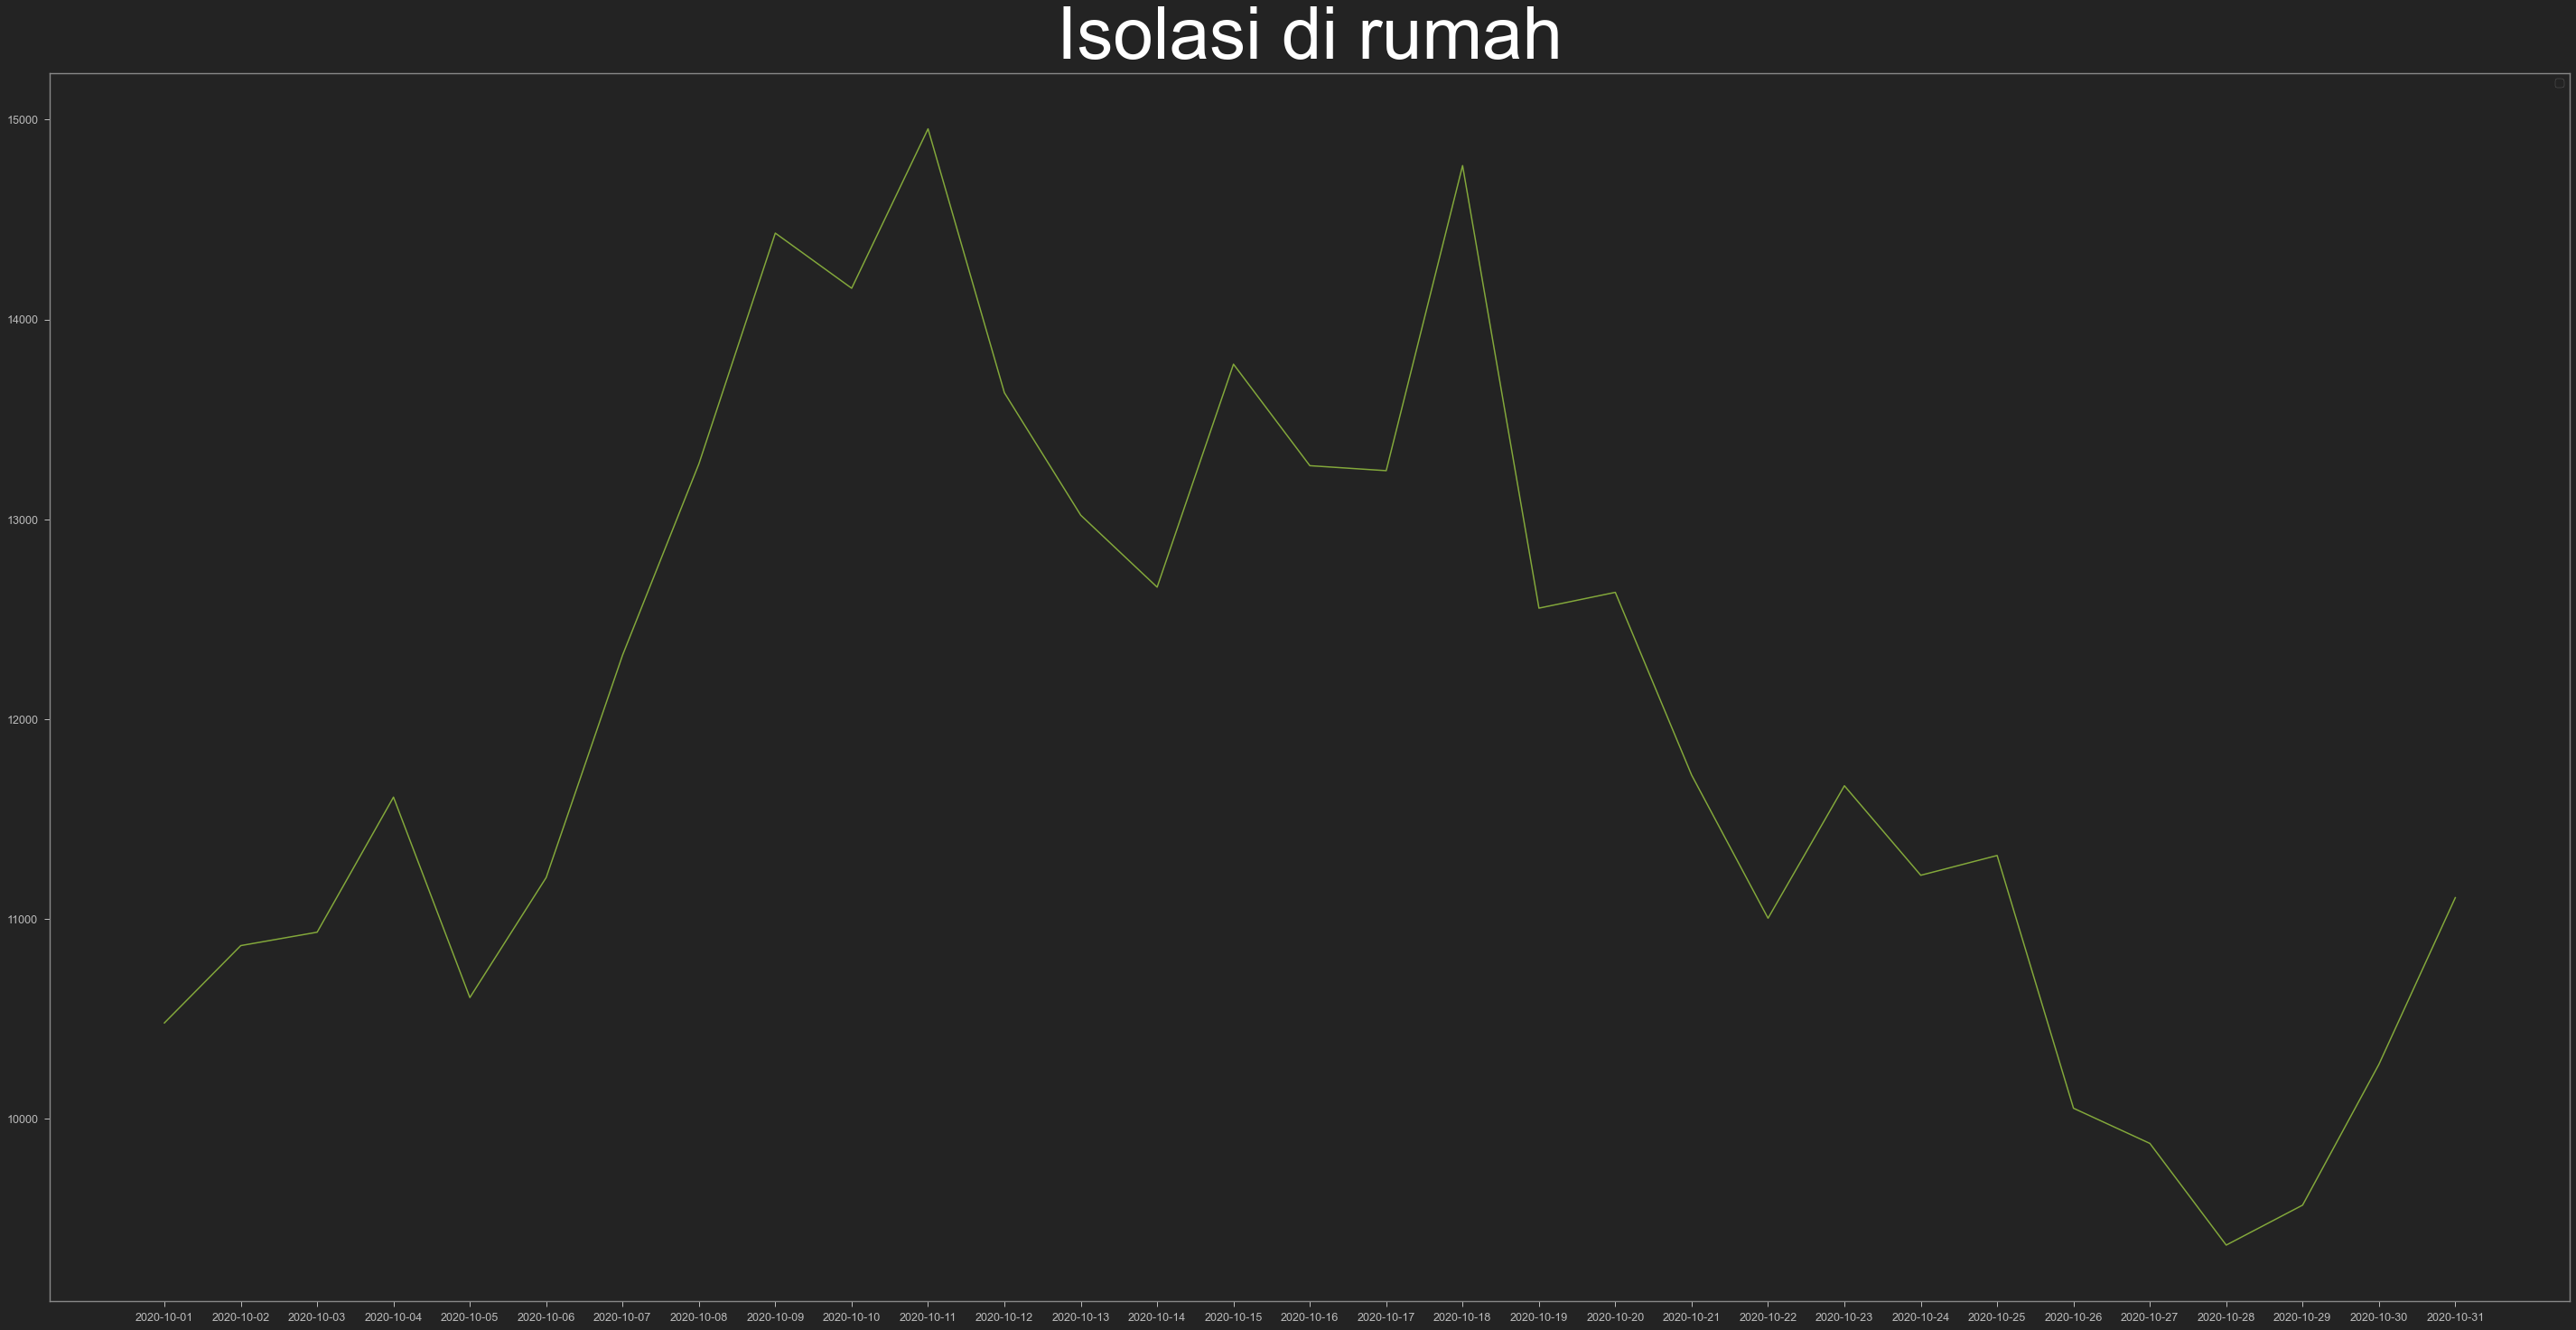

In [29]:
x = ['2020-10-01','2020-10-02','2020-10-03','2020-10-04','2020-10-05','2020-10-06','2020-10-07','2020-10-08',
     '2020-10-09','2020-10-10','2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16'
     ,'2020-10-17', '2020-10-18','2020-10-19','2020-10-20','2020-10-21','2020-10-22',
     '2020-10-23','2020-10-24','2020-10-25','2020-10-26','2020-10-27','2020-10-28',
     '2020-10-29','2020-10-30','2020-10-31']
inter = s
font1 = {'family':'sans serif',
         'color':'white',
         'size':80}

fig, ax = plt.subplots(figsize=(50,25))
plt.plot(x, inter, 'g')
plt.title('Isolasi di Rumah', fontdict = font1)
plt.legend()
plt.show()

In [9]:
l=pd.pivot_table(data,index= 'tanggal',values = 'Perawatan RS',aggfunc = 'sum', observed = True)
l

,Perawatan RS
tanggal,
01/10/2020,1368
02/10/2020,1371
03/10/2020,1910
04/10/2020,1870
05/10/2020,2060
06/10/2020,2170
07/10/2020,1807
08/10/2020,1891
09/10/2020,1960


In [10]:
p = l.values.tolist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


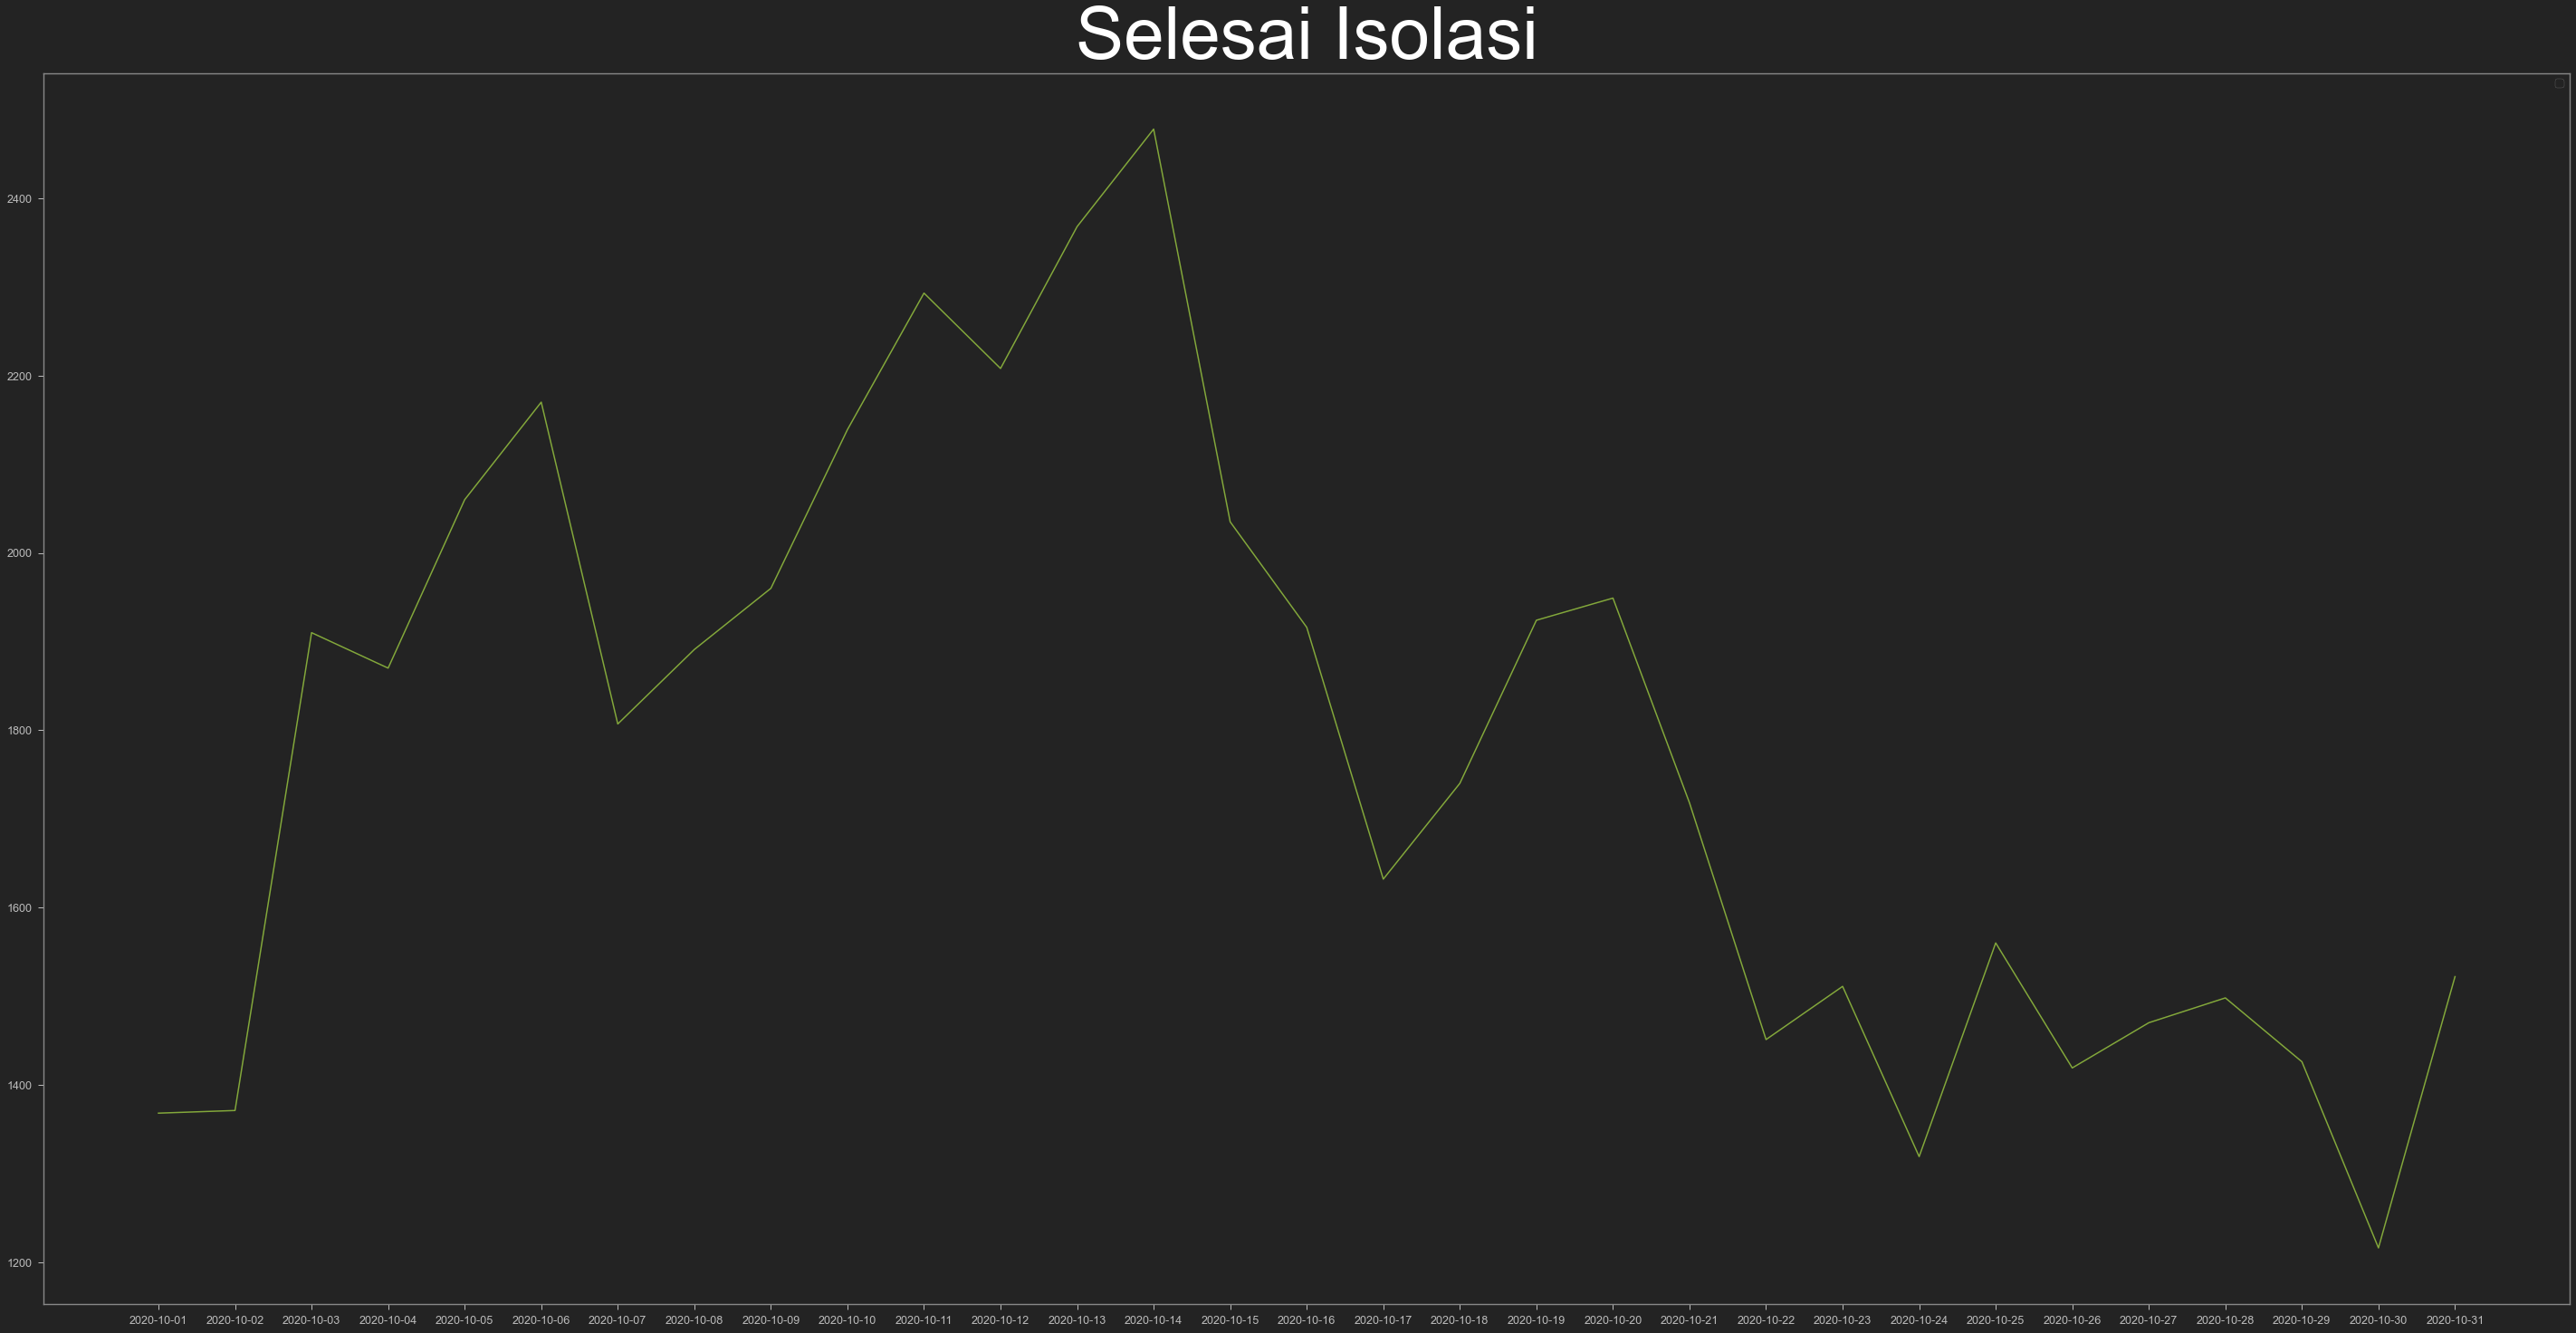

In [28]:
xa = ['2020-10-01','2020-10-02','2020-10-03','2020-10-04','2020-10-05','2020-10-06','2020-10-07','2020-10-08',
     '2020-10-09','2020-10-10','2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16'
     ,'2020-10-17', '2020-10-18','2020-10-19','2020-10-20','2020-10-21','2020-10-22',
     '2020-10-23','2020-10-24','2020-10-25','2020-10-26','2020-10-27','2020-10-28',
     '2020-10-29','2020-10-30','2020-10-31']
intera = p
font1 = {'family':'sans serif',
         'color':'white',
         'size':80}

fig, ax = plt.subplots(figsize=(50,25))
plt.plot(xa, intera, 'g')
plt.title('Perawatan RS', fontdict = font1)
plt.legend()
plt.show()

In [72]:
r=pd.pivot_table(data,index= 'tanggal',values = 'Selesai Isolasi',aggfunc = 'sum', observed = True)
r

,Selesai Isolasi
tanggal,
01/10/2020,102999
02/10/2020,104808
03/10/2020,105531
04/10/2020,105879
05/10/2020,107367
06/10/2020,109256
07/10/2020,111261
08/10/2020,113458
09/10/2020,113576


In [117]:
z = r.values.tolist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


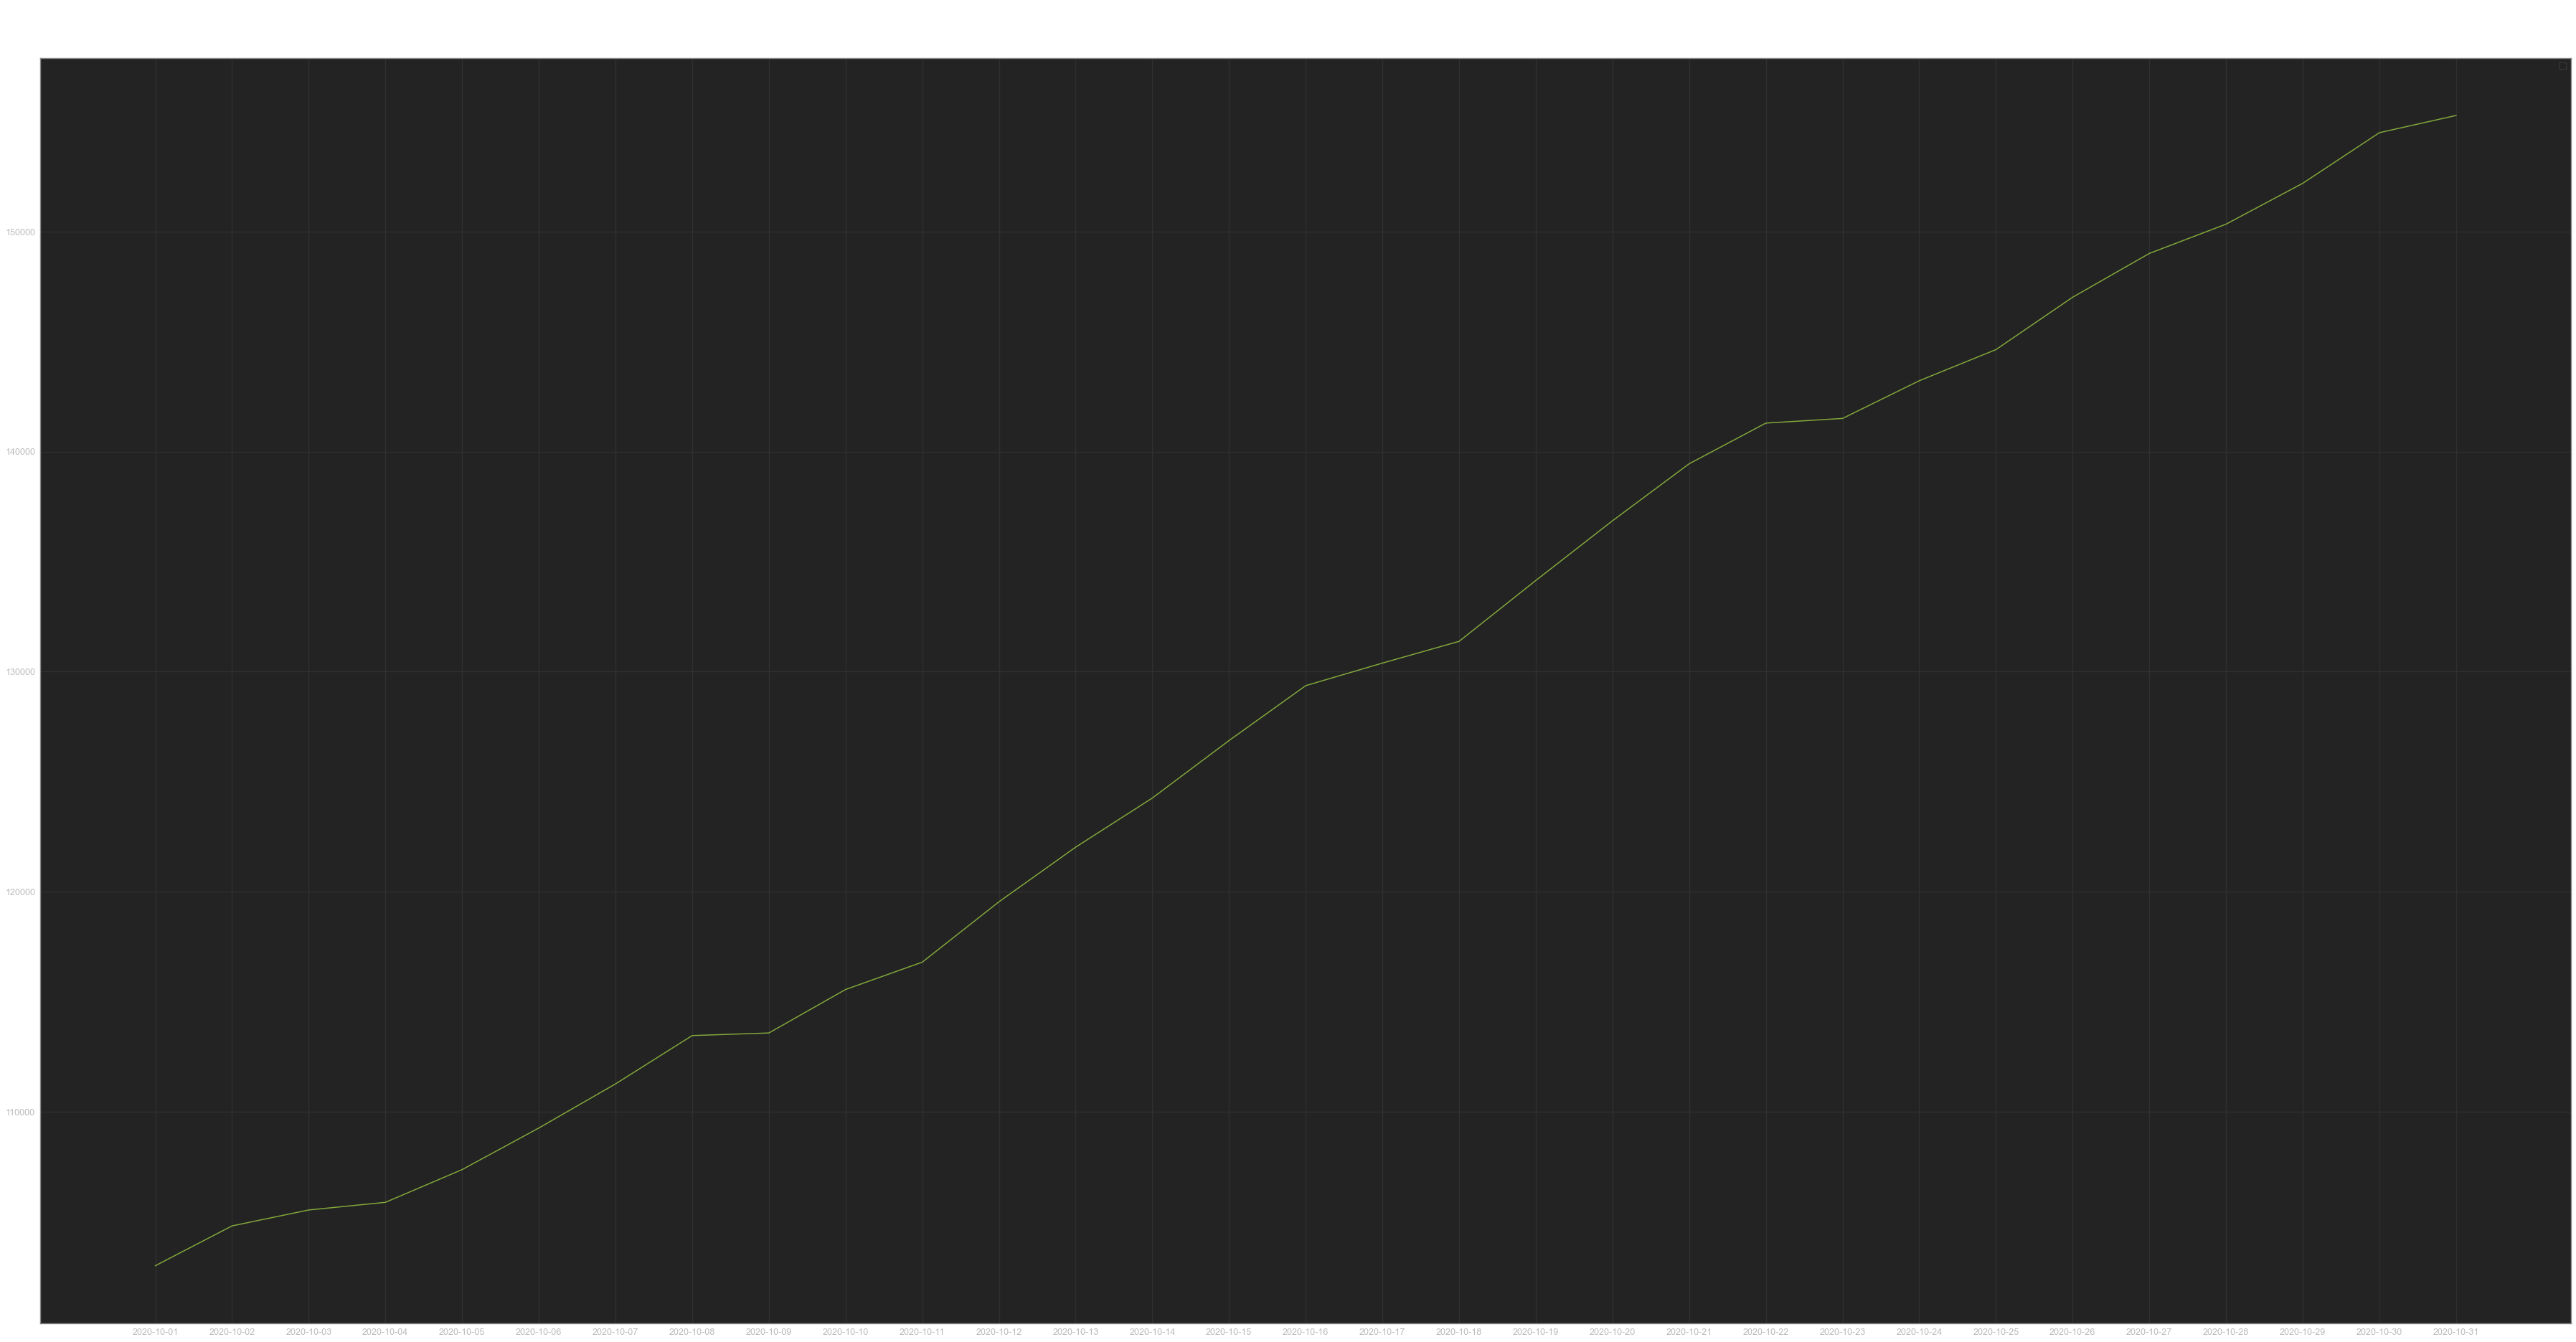

In [74]:
xa = ['2020-10-01','2020-10-02','2020-10-03','2020-10-04','2020-10-05','2020-10-06','2020-10-07','2020-10-08',
     '2020-10-09','2020-10-10','2020-10-11','2020-10-12','2020-10-13','2020-10-14','2020-10-15','2020-10-16'
     ,'2020-10-17', '2020-10-18','2020-10-19','2020-10-20','2020-10-21','2020-10-22',
     '2020-10-23','2020-10-24','2020-10-25','2020-10-26','2020-10-27','2020-10-28',
     '2020-10-29','2020-10-30','2020-10-31']
intera = z
font1 = {'family':'sans serif',
         'color':'white',
         'size':80}

fig, ax = plt.subplots(figsize=(50,25))
plt.plot(xa, intera, 'g')
plt.title('Selesai Isolasi', fontdict = font1)
plt.legend()
plt.show()

In [31]:
data2 = pd.pivot_table(data,index = ['nama_kota'],values = ['Selesai Isolasi','Suspek Meninggal',"Perawatan RS","Meninggal","Sembuh","POSITIF"], aggfunc = 'sum', observed = True)
data2

,Meninggal,POSITIF,Perawatan RS,Selesai Isolasi,Sembuh,Suspek Meninggal
nama_kota,,,,,,
JAKARTA BARAT,0,392321,7192,633157,318224,5052
JAKARTA PUSAT,0,325073,4524,426943,282856,2511
JAKARTA SELATAN,0,374931,9619,685037,300515,3221
JAKARTA TIMUR,0,481089,10476,744563,389596,3410
JAKARTA UTARA,0,319676,6320,508488,270872,1764
KAB.ADM.KEP.SERIBU,0,2654,97,9673,2421,62
LUAR DKI JAKARTA,0,235758,16971,971814,205649,3036


In [35]:
data2.index

Index(['JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR',
       'JAKARTA UTARA', 'KAB.ADM.KEP.SERIBU', 'LUAR DKI JAKARTA'],
      dtype='object', name='nama_kota')

In [62]:
JAKARTA_Sembuh = data2.loc["JAKARTA BARAT":,["Sembuh"]]
JAKARTA_Sembuh

,Sembuh
nama_kota,
JAKARTA BARAT,318224
JAKARTA PUSAT,282856
JAKARTA SELATAN,300515
JAKARTA TIMUR,389596
JAKARTA UTARA,270872
KAB.ADM.KEP.SERIBU,2421
LUAR DKI JAKARTA,205649


<function matplotlib.pyplot.show(close=None, block=None)>

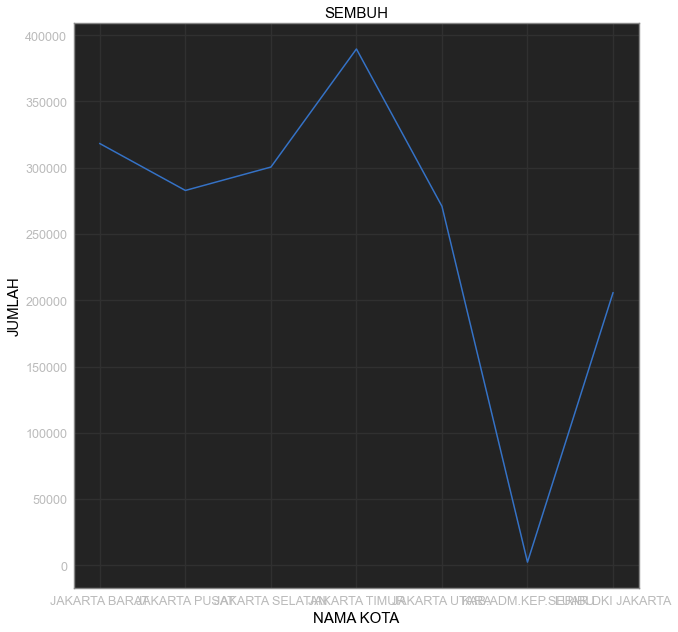

In [80]:
plt.plot(JAKARTA_Sembuh)
font1 = {'family':'sans-serif','color':'Black','size':15}
plt.xlabel('NAMA KOTA', fontdict = font1)
plt.ylabel('JUMLAH', fontdict = font1)
plt.title("SEMBUH", fontdict = font1)
plt.rcParams["figure.figsize"] = (8,8)
plt.grid(True)
plt.show

In [88]:
JAKARTA_SuspekMeninggal = data2.loc["JAKARTA BARAT":,["Suspek Meninggal"]]
JAKARTA_SuspekMeninggal

,Suspek Meninggal
nama_kota,
JAKARTA BARAT,5052
JAKARTA PUSAT,2511
JAKARTA SELATAN,3221
JAKARTA TIMUR,3410
JAKARTA UTARA,1764
KAB.ADM.KEP.SERIBU,62
LUAR DKI JAKARTA,3036


<function matplotlib.pyplot.show(close=None, block=None)>

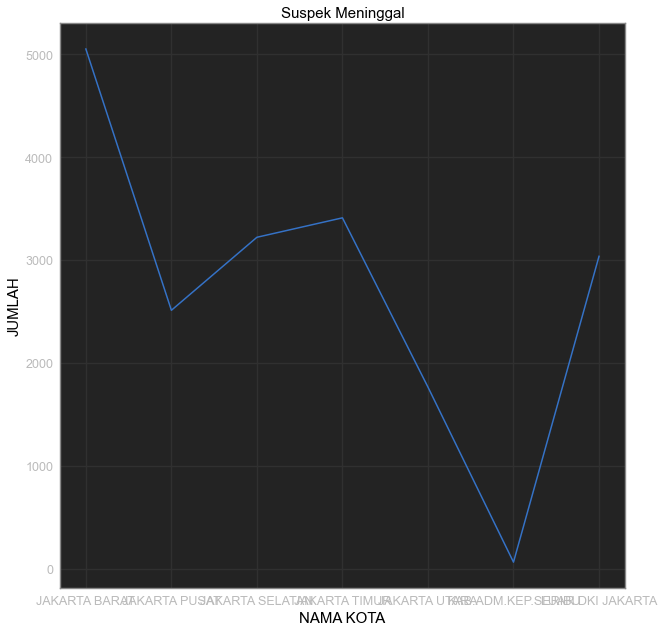

In [89]:
plt.plot(JAKARTA_SuspekMeninggal)
font1 = {'family':'sans-serif','color':'Black','size':15}
plt.xlabel('NAMA KOTA', fontdict = font1)
plt.ylabel('JUMLAH', fontdict = font1)
plt.title("Suspek Meninggal", fontdict = font1)
plt.rcParams["figure.figsize"] = (8,8)
plt.grid(True)
plt.show

In [133]:
JAKARTA_POSITIF = data2.loc["JAKARTA BARAT":,["POSITIF"]]
JAKARTA_POSITIF = JAKARTA_POSITIF.drop("KAB.ADM.KEP.SERIBU")
JAKARTA_POSITIF = JAKARTA_POSITIF.drop("LUAR DKI JAKARTA")
Test = [392321, 325073, 374931, 481089, 319676]
Test
JAKARTA_POSITIF

,POSITIF
nama_kota,
JAKARTA BARAT,392321
JAKARTA PUSAT,325073
JAKARTA SELATAN,374931
JAKARTA TIMUR,481089
JAKARTA UTARA,319676


In [134]:
Name = ['JAKARTA BARAT',
'JAKARTA PUSAT',
'JAKARTA SELATAN',
'JAKARTA TIMUR',
'JAKARTA UTARA']

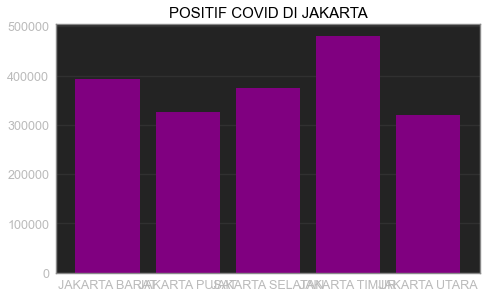

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(Name,Test, color='purple')
plt.title("POSITIF COVID DI JAKARTA", fontdict = font1)
plt.grid(axis = 'x')
plt.show()

# Conlusion

Kesimpulan untuk solusi dari permasalahan covid-19 yang telah tercantum pada Problem Statment menurut kami setelah mengolah data dan menganalisis data yang ada adalah, dengan kita mengetahui data-data covid di daerah Jakarta saja menurut kami belum efektif untuk meminimalisir covid-19 namun dengan adanya data dari daerah Jakarta, kami dapat menyimpulkan bahwa Jakarta timur lebih banyak positif covid, dan Jakarta barat lebih banyak meninggal dibandingkan jakarta lainnya, lalu diikuti oleh angka keselamatan atau sembuh yang dimana Jakarta Timur masih pertama. dari data tersebut kami mengambil solusi dari permasalahan ini adalah dengan adanya data pemerintah dapat dengan cepat dan sigap untuk memprediksi lunjakan covid akan terjadi didaerah mana selanjutnya dengan mengambil key parameter yaitu dari kolom SUSPEK, Probable Meninggal, Meninggal, POSITIF, Dirawat dan Sembuh yang ada pada dataframe.

# Daftar Pustaka

1. http://p2p.kemkes.go.id/penguatan-sistem-kesehatan-dalam-pengendalian-covid-19/
2. https://www.kompas.com/tren/read/2021/06/25/160500965/penambahan-kasus-covid-19-indonesia-peringkat-ke-5-sedunia?page=all
3. https://www.who.int/news-room/questions-and-answers/item/coronavirus-disease-covid-19-how-is-it-transmitted